In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('ticks')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.style.use('ggplot')

%matplotlib inline

In [4]:
df = pd.read_csv('gun-violence-data/gun-violence-data_01-2013_03-2018.csv')

## Missing values Table

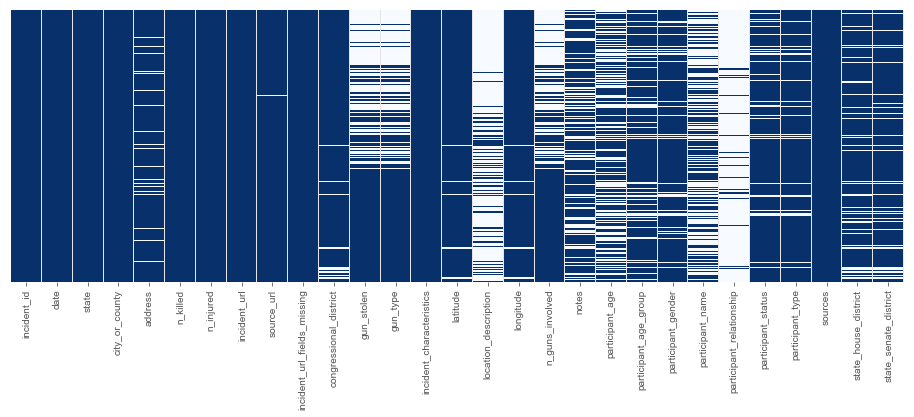

In [5]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Blues_r')
plt.show()

From the figure above, we can observe that some columns are missing a lot of data. We will drop those columns

## Check the Source .... For Fake News

Let check Where this source are....NOT FAKE NEWS

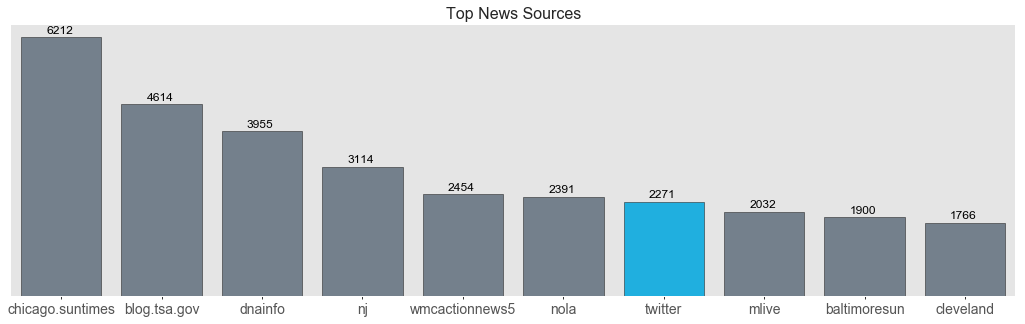

In [6]:
from urllib.parse import urlparse
df_source = df.dropna(subset=['sources'],axis=0)

df_source.reset_index(drop=True,inplace=True)

df_source['clean_source'] = [urlparse(df_source.sources[i]).netloc for i in range(len(df_source.sources))]
df_source['clean_source'] = [df_source.clean_source[i].replace('www.','').replace('.com','') for i in range(len(df_source.sources))]

f,ax=plt.subplots(figsize = (18,5))
source_count = df_source.clean_source.value_counts().head(10)
color=['slategray','slategray','slategray','slategray','slategray','slategray','deepskyblue'
       ,'slategray','slategray','slategray']
sns.barplot(y=source_count.values,x=source_count.index,ax=ax,palette=color,edgecolor='0.1')
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height()+100,str(int(i.get_height())),color='black',fontsize=12)
ax.tick_params(length=3,color='black',labelsize=14)
ax.set_title('Top News Sources',fontsize=16)
y_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

## Gun Violence per Year

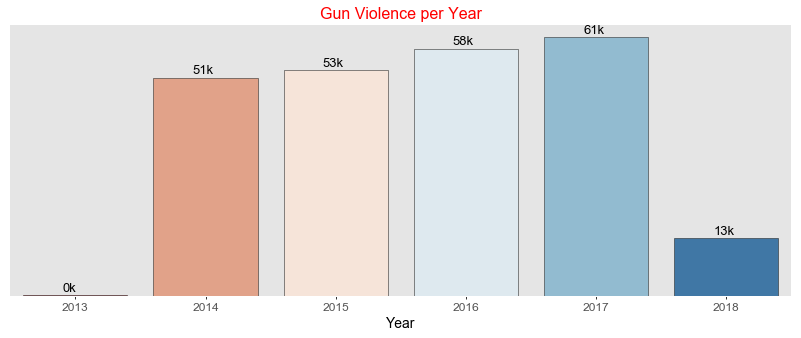

In [7]:
df['date'] = pd.to_datetime(df.date)

df['year'] = [df.date[i].year for i in range(len(df.date))]

f,ax=plt.subplots(figsize = (14,5))
year_count = df['year'].value_counts()
sns.barplot(y=year_count.values,x=year_count.index,ax=ax,palette='RdBu',edgecolor='0.1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+1000,
            str(int(i.get_height()/1000))+'k',color='black',fontsize=13)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('Year',color='black',fontsize=14)
ax.set_title('Gun Violence per Year',fontsize=16,color='Red')
y_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

I Absolutely DO NOT believe that there were less than a 1000 gun violence in 2013...so, I won't consider in the following analysis

## Mapping the Location of the Top 10 Safest State in US

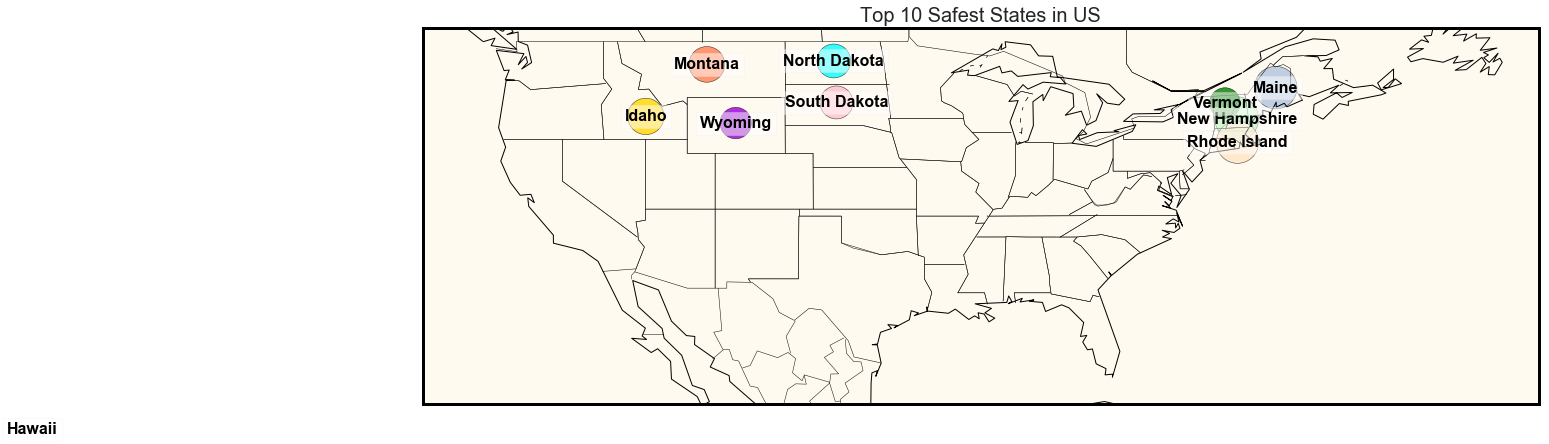

In [8]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

plt.figure(figsize=(20,30))
m1 = Basemap(llcrnrlon=-130,llcrnrlat=23,urcrnrlon=-50,urcrnrlat=50,
        projection='cyl',resolution='c')
m1.drawcoastlines()
m1.drawcountries()
# Different types of Map background
#m1.shadedrelief()
#m1.bluemarble()
#m1.fillcontinents(color='white',lake_color='aqua')
m1.drawmapboundary(linewidth=3,fill_color='FloralWhite')
m1.drawstates(color='0.05')
#Getting the longitude and latitude
state = ['New Hampshire', 'Maine', 'Rhode Island', 'Idaho', 'Montana','North Dakota', 'South Dakota',
         'Wyoming', 'Vermont', 'Hawaii']
long_x = [-71.6553992, -68.8590201,-71.5992372,-114.0154071, -109.6387579, -100.540737, -100.348761,-107.5685348,-72.5002608,
 -157.975203]
lat_x = [43.4849133, 45.709097,41.7962409,43.6447642,47.3752671,47.6201461,44.6471761,43.1700264,44.5990718,
 21.2160437]
colors = ['lightgreen','LightSteelBlue','bisque','gold','Coral','cyan',
          'pink','darkviolet','green','orange']
area = [964, 907, 895, 661, 638, 573, 544, 494, 472, 289]
new_area = [area[i]*2 for i in range(len(area))]# I double the number of gun violent for to make the circle a little 
# bigger
#plotting the map
for i in range(len(area)):
    plt.text (long_x[i], lat_x[i],state[i],fontsize=16,fontweight='bold',
                    ha='center',va='center',color='black',bbox=dict(facecolor='white', alpha=0.5))
plt.scatter(long_x,lat_x,s=new_area,c=colors,alpha=0.8,marker='o',edgecolors='black',linewidths=0.5)
plt.title('Top 10 Safest States in US',fontsize=20)
plt.show()

## First and Second Safest State 2014-2018

In [9]:
def save_place(state,n):
    ind=[]
    val=[]
    for i in [2014,2015,2016,2017,2018]:
        data = df[df['year']==i]
        df_city = data.dropna(subset=[state],axis=0)
        df_city.reset_index(drop=True,inplace=True)
        ind.append(df_city[state].value_counts().tail().index[n])
        val.append(df_city[state].value_counts().tail().values[n])
    return ind,val

### First safest State during [2014-2018]

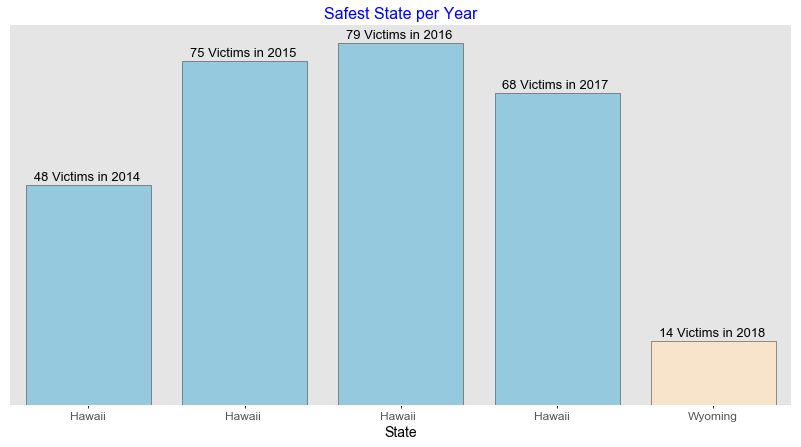

In [10]:
save_state_1 = save_place('state',-1)

f,ax=plt.subplots(figsize = (14,7))
#year_count = df['year'].value_counts()
save_state_1[0][1]= 'Hawaii '
save_state_1[0][2]= 'Hawaii  '
save_state_1[0][3]= 'Hawaii   '
# i am replacing the elt at position 1,2,3 with a little space cuz i want it to show on the graph
#if this isn't done, the values of hawaii will be added and the mean will be plot 
color = ['skyblue','skyblue','skyblue','skyblue','bisque']
sns.barplot(y=save_state_1[1],x=save_state_1[0],ax=ax,palette=color,ci=None,edgecolor='0.2')
yr = ['2014','2015','2016','2017','2018']
for k, i in enumerate(ax.patches):
    ax.text(i.get_x()+.05,i.get_height()+1,
            str(int(i.get_height()))+' Victims in '+ yr[k],color='black',fontsize=13)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('State',color='black',fontsize=14)
ax.set_title('Safest State per Year',fontsize=16,color='Blue')
#ax.legend('label1 label2 label3')
y_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

### Second Safest State [2014-2018]

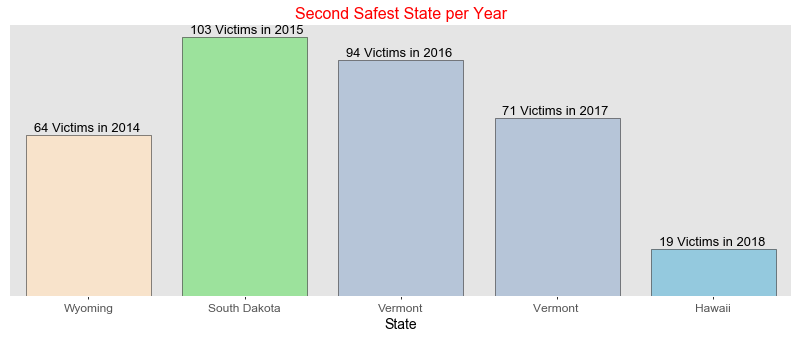

In [11]:
save_state_2 = save_place('state',-2)

f,ax=plt.subplots(figsize = (14,5))
#year_count = df['year'].value_counts()
save_state_2[0][3]='Vermont '
# i am replacing the elt at position 3 with a little space cuz i want it to show on the graph
#if this isn't done, the values of both vernon will be added
color = ['bisque','lightgreen','LightSteelBlue','LightSteelBlue','skyblue']
sns.barplot(y=save_state_2[1],x=save_state_2[0],ax=ax,palette=color,ci=None,edgecolor='0.1')
yr = ['2014','2015','2016','2017','2018']
for k, i in enumerate(ax.patches):
    ax.text(i.get_x()+.05,i.get_height()+1.5,
            str(int(i.get_height()))+' Victims in '+ yr[k],color='black',fontsize=13)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('State',color='black',fontsize=14)
ax.set_title('Second Safest State per Year',fontsize=16,color='Red')
#ax.legend('label1 label2 label3')
y_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

## Time Analysis in Safest State

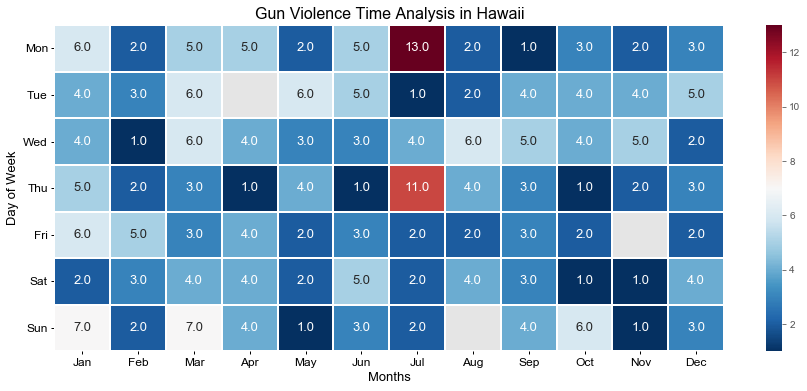

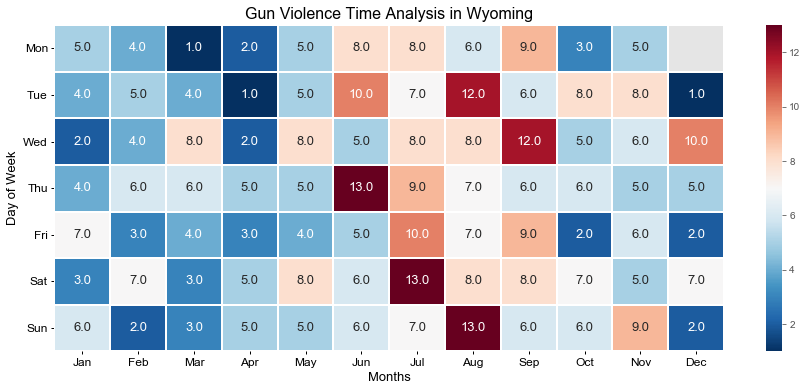

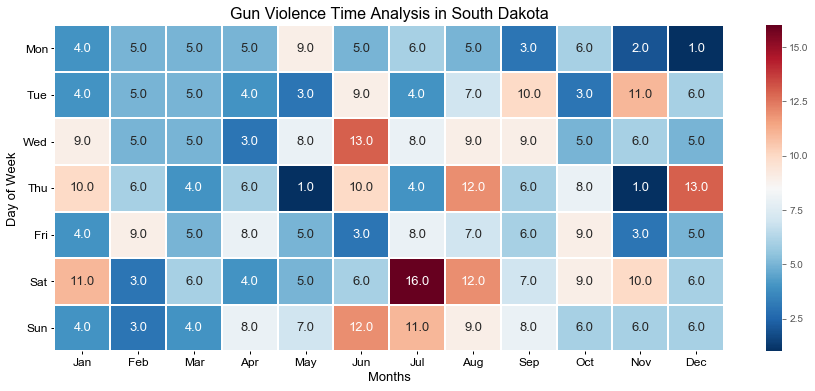

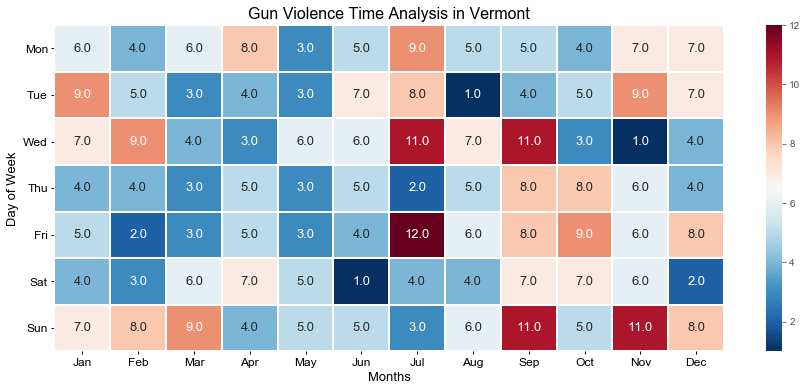

In [12]:
state_list = ['Hawaii','Wyoming','South Dakota','Vermont']
col = ['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 
       'source_url','location_description','longitude','latitude']
df_save = df[df['state'].isin(state_list)]
df_save = df_save.loc[:,col]
df_save.reset_index(drop=True,inplace=True)

from pandas.api.types import CategoricalDtype

df_save['date'] = pd.to_datetime(df_save.date)
df_save['year']= df_save['date'].apply(lambda x: x.year)
df_save['month']= df_save['date'].apply(lambda x: x.month) #this will extract Month from date format
df_save['day of week']= df_save['date'].apply(lambda x: x.dayofweek)

    # Extracting Month date
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
             9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_save['month'] = df_save['month'].map(dmonth)
    #Categorizing the month from the normal order
cat_type = CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 
                                            'Aug','Sep', 'Oct', 'Nov', 'Dec'],ordered=True)
df_save['month'] = df_save['month'].astype(cat_type)

    # Extracting Day of Week from date
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
cat_type_2 = CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat', 'Sun'],ordered=True)

df_save['day of week']= df_save['day of week'].map(dmap)
df_save['day of week'] = df_save['day of week'].astype(cat_type_2)

def save_func(input,cmap):
        
    data= df_save[df_save.state == input]
    event_timeline = data.groupby(['day of week','month']).count()['incident_id'].unstack()

    f, ax = plt.subplots(figsize=(15,6))

    ax = sns.heatmap(event_timeline, cmap=cmap,linecolor='white',linewidths=1,annot=True,fmt='.1f',
                    ax=ax,annot_kws={'fontsize':13},edgecolor='0.2')
    ax.tick_params(length=3, width=1, colors='black',labelsize='large')
    kwargs= {'fontsize':13, 'color':'black'}
    ax.set_xlabel('Months',**kwargs)
    ax.set_ylabel('Day of Week',**kwargs)
    ax.set_title('Gun Violence Time Analysis in '+ input,fontdict={'fontsize':16, 'color':'black'})
    plt.yticks(rotation=0) 
    return plt.show()

save_func('Hawaii',cmap='RdBu_r')
save_func('Wyoming',cmap='RdBu_r')
save_func('South Dakota',cmap='RdBu_r')
save_func('Vermont',cmap='RdBu_r')

## Real New Source From the Safest State

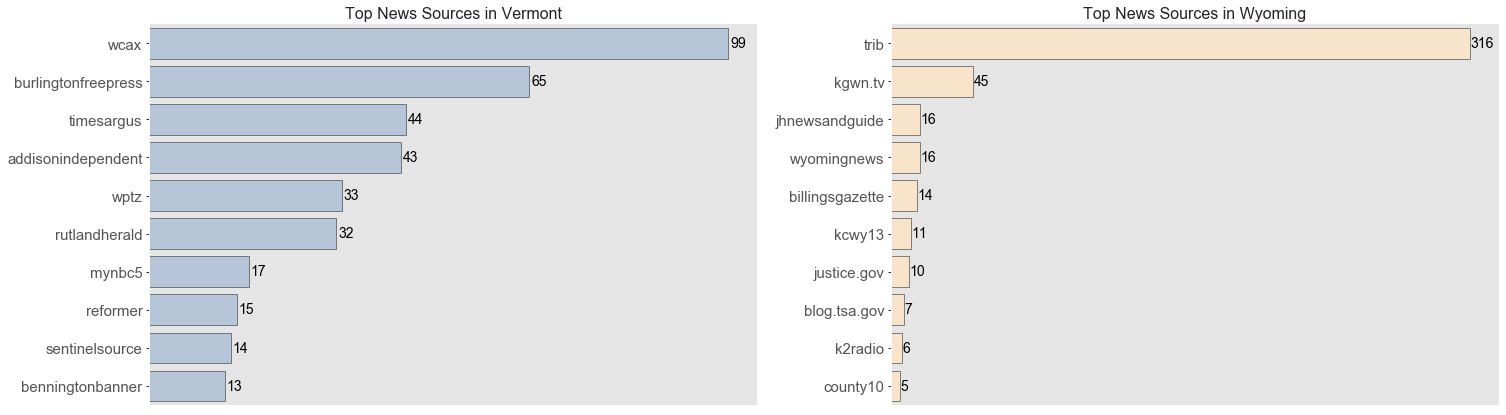

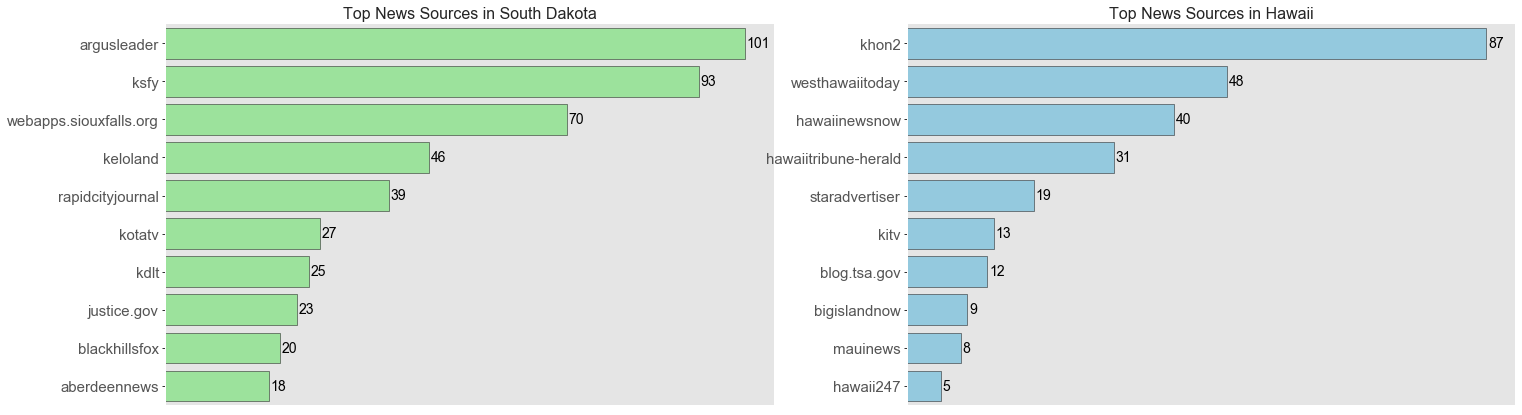

In [13]:
def safe_source(input1,input2,col1,col2):
    
    imp = [input1,input2]
    source_count = []
    for inp in imp:
        df_s = df_save[df_save.state==inp].dropna(subset=['source_url'],axis=0)

        df_s.reset_index(drop=True,inplace=True)

        df_s['clean_source'] = [urlparse(df_s.source_url[i]).netloc for i in range(len(df_s.source_url))]
        df_s['clean_source'] = [df_s.clean_source[i].replace('www.','').replace('.com','') for i in range(len(df_s.source_url))]
        source_count.append(df_s.clean_source.value_counts().head(10))
    
    f,(ax1,ax2)=plt.subplots(1,2,figsize = (10,7))
    col = [col1,col2]
    axes = [ax1,ax2]
    for k in range(len(axes)):
        sns.barplot(x=source_count[k].values,y=source_count[k].index,ax=axes[k],color=col[k],edgecolor='0.1')
        for i in axes[k].patches:
            axes[k].text(i.get_width()+0.3,i.get_y()+0.5,str(int(i.get_width())),color='black',fontsize=14)
        axes[k].tick_params(length=3,color='black',labelsize=15)
        axes[k].set_title('Top News Sources in '+imp[k],fontsize=16)
        x_axis = axes[k].axes.get_xaxis().set_visible(False)
        sns.despine(bottom=True)
        f.subplots_adjust(wspace=0.22,right= 2)
    return plt.show()

safe_source('Vermont','Wyoming','LightSteelBlue','bisque')
safe_source('South Dakota','Hawaii','lightgreen','skyblue')

## Less Safe Cities in the Safest States

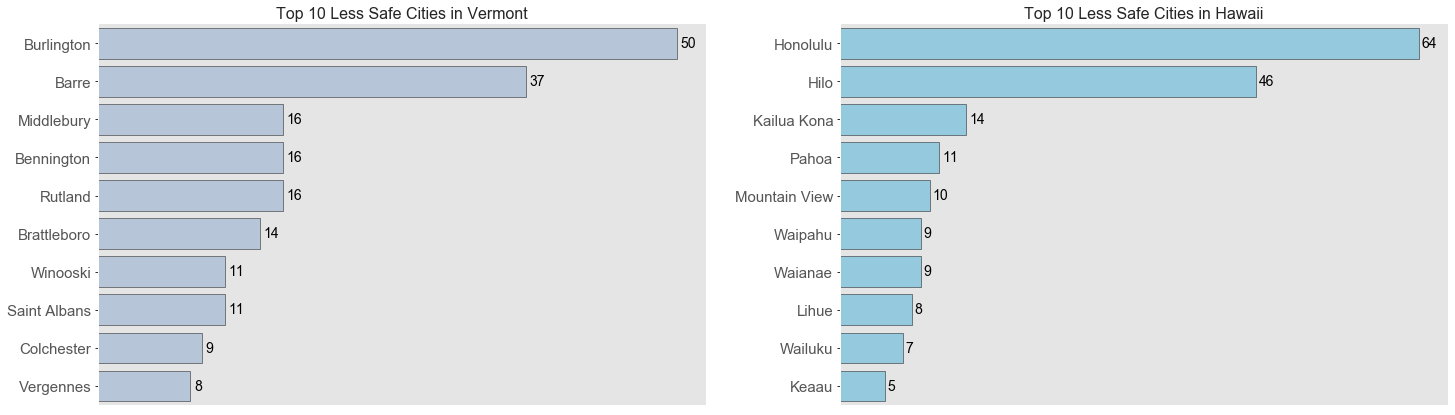

In [14]:
def less_safe_city(input1,input2,col1,col2):
    
    imp = [input1,input2]
    source_count = []
    for inp in imp:
        df_s = df_save[df_save.state==inp].dropna(subset=['city_or_county'],axis=0)
        df_s.reset_index(drop=True,inplace=True)
        source_count.append(df_s['city_or_county'].value_counts().head(10))
    
    f,(ax1,ax2)=plt.subplots(1,2,figsize = (10,7))
    col = [col1,col2]
    axes = [ax1,ax2]
    for k in range(len(axes)):
        sns.barplot(x=source_count[k].values,y=source_count[k].index,ax=axes[k],color=col[k],edgecolor='0.1')
        for i in axes[k].patches:
            axes[k].text(i.get_width()+0.3,i.get_y()+0.5,str(int(i.get_width())),color='black',fontsize=14)
        axes[k].tick_params(length=3,color='black',labelsize=15)
        axes[k].set_title('Top 10 Less Safe Cities in '+imp[k],fontsize=16)
        x_axis = axes[k].axes.get_xaxis().set_visible(False)
        sns.despine(bottom=True)
        f.subplots_adjust(wspace=0.22,right= 2)
    return plt.show()

less_safe_city('Vermont','Hawaii','LightSteelBlue','skyblue')

### Less Safest Cities in Wyoming & South Dakota

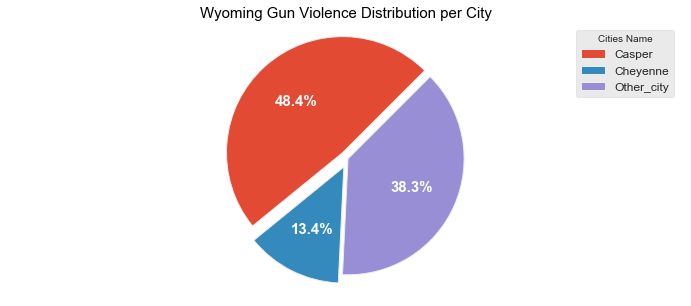

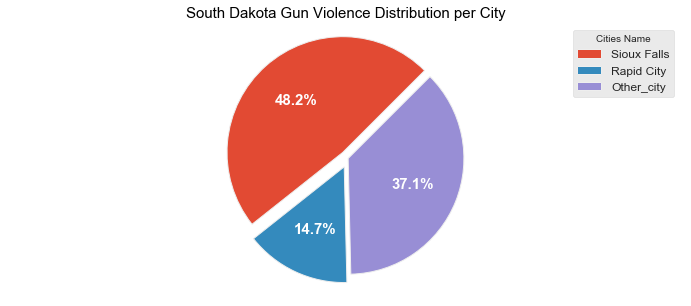

In [15]:
def pie_danger(input): 
  a = df_save[df_save.state==input].dropna(subset=['city_or_county'],axis=0)
  aa = a['city_or_county'].value_counts().reset_index()
  other = aa.iloc[2:]
  keep_data = aa.iloc[:2]
  keep_data = keep_data.append({'index':'Other_city','city_or_county':other.city_or_county.sum()},ignore_index=True)
  keep_data.columns = ['city','count']
  
  # Graph
  plt.figure(figsize=(12,5))
  labels = keep_data['city'].values
  sizes = keep_data['count'].values
  explode = (0.07,0.08,0)
  plt.pie(sizes, explode=explode,labels=labels,autopct='%1.1f%%', startangle=45,
        wedgeprops = {'linewidth': 1,},textprops ={'color':'white','fontsize':15,'weight':'bold'})
  plt.legend(labels,loc='best',ncol=1,fontsize=12,title ='Cities Name')
  plt.axis('equal')
  plt.title(input + ' Gun Violence Distribution per City',color = 'black',fontsize =15)
  
  return plt.show()

pie_danger('Wyoming')
pie_danger('South Dakota')